# 고양이 수염 스티커 만들기

### 1. 사진 준비하기

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

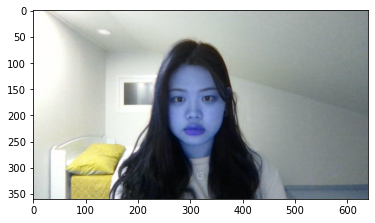

In [2]:
#이미지 읽기
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/testimage.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지 불러오기
img_bgr = cv2.resize(img_bgr, (640, 360)) #resize
img_show = img_bgr.copy()      # 출력용 이미지 보관
plt.imshow(img_bgr)
plt.show()

출력 결과, 얼굴에 푸른빛이 감돈다.  
OpenCV는 BGR(파랑, 녹색, 빨강)을 사용. 사진에서 붉은색<->푸른색으로 바뀌어 출력됨

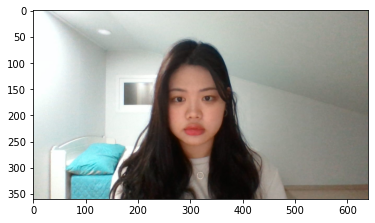

In [3]:
#RGB 이미지로 색깔 보정처리 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

### 2. 얼굴 검출 face detection

In [4]:
#dlib을 활용해 hog detecto 선언
detector_hog = dlib.get_frontal_face_detector()

In [5]:
#detector_hog를 이용해 얼굴의 bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #cvtColor()을 이용해 OpenCV bgr이미지 rgb로 변환
dlib_rects = detector_hog(img_rgb, 1)  #두번째 파라미터인 1은 이미지 피라미드의 수

rectangles[[(239, 139) (368, 268)]]


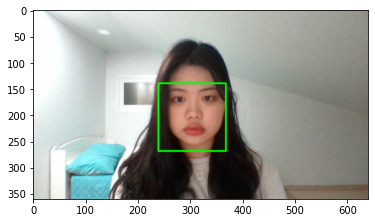

In [6]:
#찾은 얼굴 출력
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 3. 얼굴 랜드마크 face landmark

In [7]:
#저장한 landmark 모델 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [8]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark 찾아내기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)  #rgb이미지, dlib.rectangle을 입력받아 dlib.full_object_detection를 반환
    # face landmark 좌표 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))  #point는 dlib.full_object_detection 객체로 parts() 함수로 개별 위치에 접근 가능
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


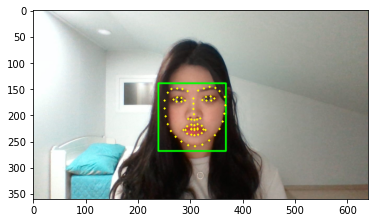

In [9]:
#랜드마크 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 4. 스티커 적용하기

In [10]:
#코 중심점 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코 중심 index 30
    x = landmark[30][0] #x축
    y = landmark[30][1] - dlib_rect.height()//2  #y축
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(307, 198)
(x,y) : (307,133)
(w,h) : (130,130)


In [11]:
#스티커 이미지 읽어서 적용
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(130, 130, 3)


In [12]:
#스티커 이미지 추가를 위해 x,y좌표 조정
refined_x = x - w // 2 
refined_y = y + h // 15
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (242,141)


In [13]:
#원본이미지에 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
sticker_added = cv2.addWeighted(img_sticker, 0.5, sticker_area, 0.5, 0)
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

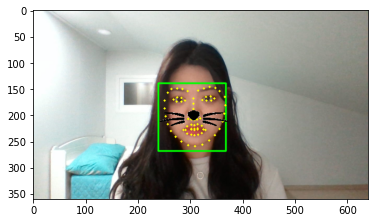

In [14]:
#결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

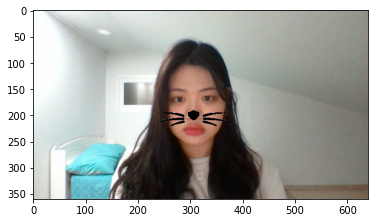

In [15]:
#bounding box와 landmark제거
sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGBA))
plt.show()

### 5. 문제점 찾아보기

#### 1. 이미지 밝기

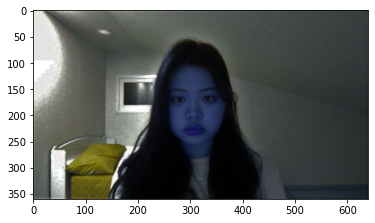

In [16]:
#이미지 읽기
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/testimage1.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지 불러오기
img_bgr = cv2.resize(img_bgr, (640, 360)) #resize
img_show = img_bgr.copy()      # 출력용 이미지 보관
plt.imshow(img_bgr)
plt.show()

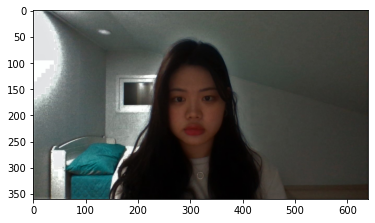

In [17]:
#RGB 이미지로 색깔 보정처리 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(239, 139) (368, 268)]]


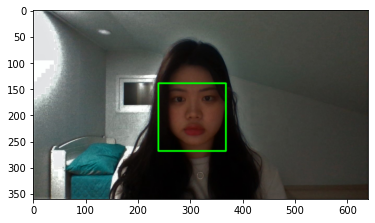

In [18]:
#dlib을 활용해 hog detecto 선언
detector_hog = dlib.get_frontal_face_detector()

#detector_hog를 이용해 얼굴의 bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #cvtColor()을 이용해 OpenCV bgr이미지 rgb로 변환
dlib_rects = detector_hog(img_rgb, 1)  #두번째 파라미터인 1은 이미지 피라미드의 수

#찾은 얼굴 출력
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

68


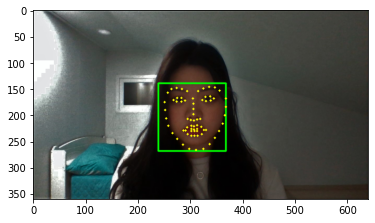

In [19]:
#저장한 landmark 모델 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark 찾아내기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)  #rgb이미지, dlib.rectangle을 입력받아 dlib.full_object_detection를 반환
    # face landmark 좌표 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))  #point는 dlib.full_object_detection 객체로 parts() 함수로 개별 위치에 접근 가능
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

#랜드마크 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

(306, 198)
(x,y) : (306,133)
(w,h) : (130,130)
(130, 130, 3)
(x,y) : (241,141)


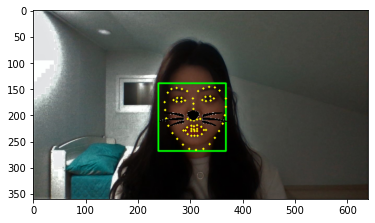

In [20]:
#코 중심점 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코 중심 index 30
    x = landmark[30][0] #x축
    y = landmark[30][1] - dlib_rect.height()//2  #y축
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    
#스티커 이미지 읽어서 적용
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

#스티커 이미지 추가를 위해 x,y좌표 조정
refined_x = x - w // 2 
refined_y = y + h // 15
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

#원본이미지에 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
sticker_added = cv2.addWeighted(img_sticker, 0.5, sticker_area, 0.5, 0)
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

#결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

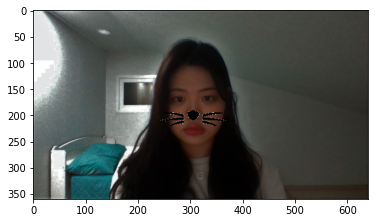

In [21]:
#bounding box와 landmark제거
sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGBA))
plt.show()

원본 이미지의 밝기를 낮춰 테스트 해보았다.  
밝기가 어두움에도 불구하고 영역 좌표와 랜드마크가 정확하게 적용되었다.  
바운딩박스와 랜드마크를 제거했을 때, 랜드마크가 스티커 근처에 희미하게 남아있는 문제점을 확인 할 수 있다.

#### 2. 얼굴각도 (살짝 측면)

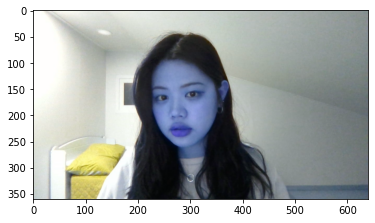

In [22]:
#이미지 읽기
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/testimage2.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지 불러오기
img_bgr = cv2.resize(img_bgr, (640, 360)) #resize
img_show = img_bgr.copy()      # 출력용 이미지 보관
plt.imshow(img_bgr)
plt.show()

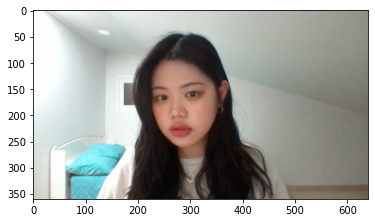

In [23]:
#RGB 이미지로 색깔 보정처리 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(210, 125) (339, 254)]]


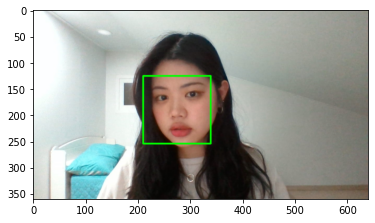

In [24]:
#dlib을 활용해 hog detecto 선언
detector_hog = dlib.get_frontal_face_detector()

#detector_hog를 이용해 얼굴의 bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #cvtColor()을 이용해 OpenCV bgr이미지 rgb로 변환
dlib_rects = detector_hog(img_rgb, 1)  #두번째 파라미터인 1은 이미지 피라미드의 수

#찾은 얼굴 출력
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

68


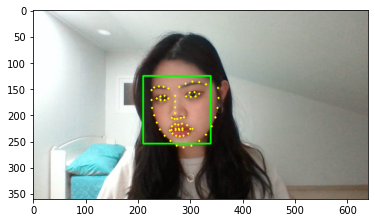

In [25]:
#저장한 landmark 모델 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark 찾아내기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)  #rgb이미지, dlib.rectangle을 입력받아 dlib.full_object_detection를 반환
    # face landmark 좌표 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))  #point는 dlib.full_object_detection 객체로 parts() 함수로 개별 위치에 접근 가능
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

#랜드마크 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

(271, 196)
(x,y) : (271,131)
(w,h) : (130,130)
(130, 130, 3)
(x,y) : (206,139)


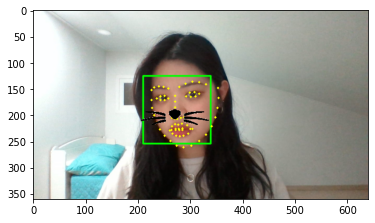

In [26]:
#코 중심점 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코 중심 index 30
    x = landmark[30][0] #x축
    y = landmark[30][1] - dlib_rect.height()//2  #y축
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    
#스티커 이미지 읽어서 적용
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

#스티커 이미지 추가를 위해 x,y좌표 조정
refined_x = x - w // 2 
refined_y = y + h // 15
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

#원본이미지에 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
sticker_added = cv2.addWeighted(img_sticker, 0.5, sticker_area, 0.5, 0)
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

#결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

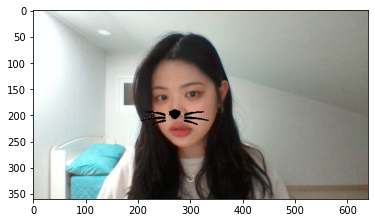

In [27]:
#bounding box와 landmark제거
sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGBA))
plt.show()

살짝 측면으로 고개를 틀었을 때에도, 정면 이미지와 같이 영역좌표 및 랜드마크를 잘 인식해 스티커가 정확한 위치에 적용 된 것을 확인할 수 있다. 

#### 3. 얼굴각도 (옆면 가까이)

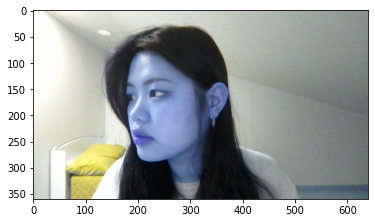

In [28]:
#이미지 읽기
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/testimage3.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지 불러오기
img_bgr = cv2.resize(img_bgr, (640, 360)) #resize
img_show = img_bgr.copy()      # 출력용 이미지 보관
plt.imshow(img_bgr)
plt.show()

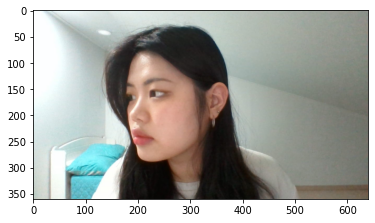

In [29]:
#RGB 이미지로 색깔 보정처리 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(118, 98) (304, 284)]]


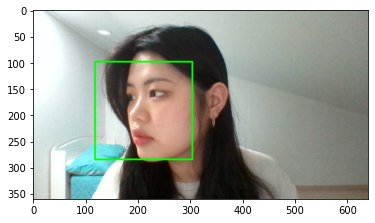

In [30]:
#dlib을 활용해 hog detecto 선언
detector_hog = dlib.get_frontal_face_detector()

#detector_hog를 이용해 얼굴의 bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #cvtColor()을 이용해 OpenCV bgr이미지 rgb로 변환
dlib_rects = detector_hog(img_rgb, 1)  #두번째 파라미터인 1은 이미지 피라미드의 수

#찾은 얼굴 출력
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

68


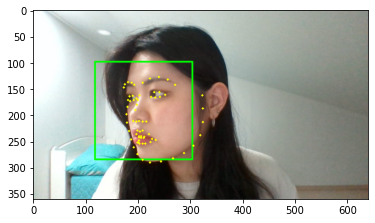

In [31]:
#저장한 landmark 모델 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark 찾아내기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)  #rgb이미지, dlib.rectangle을 입력받아 dlib.full_object_detection를 반환
    # face landmark 좌표 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))  #point는 dlib.full_object_detection 객체로 parts() 함수로 개별 위치에 접근 가능
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

#랜드마크 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

(195, 190)
(x,y) : (195,97)
(w,h) : (187,187)
(187, 187, 3)
(x,y) : (102,109)


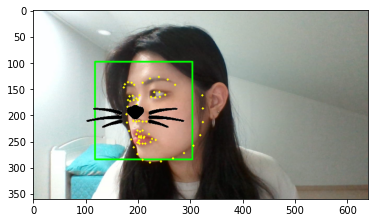

In [32]:
#코 중심점 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코 중심 index 30
    x = landmark[30][0] #x축
    y = landmark[30][1] - dlib_rect.height()//2  #y축
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    
#스티커 이미지 읽어서 적용
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

#스티커 이미지 추가를 위해 x,y좌표 조정
refined_x = x - w // 2 
refined_y = y + h // 15
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

#원본이미지에 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
sticker_added = cv2.addWeighted(img_sticker, 0.5, sticker_area, 0.5, 0)
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

#결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

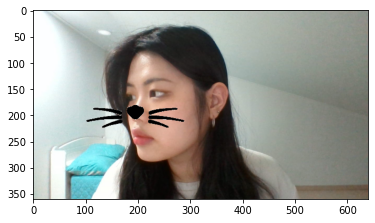

In [33]:
#bounding box와 landmark제거
sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGBA))
plt.show()

완전히 옆면으로 한 경우는 가까이와 멀리, 두 가지의 경우를 테스트 해보았다.  
예상 외로 영역 좌표와 랜드마크 모두 잘 인식되었다.  
다만 랜드마크의 입 부분이 정확한 위치에 적용되지 않았지만, 스티커는 문제 없이 적용되었다.

#### 4. 얼굴각도 (옆면 멀리)

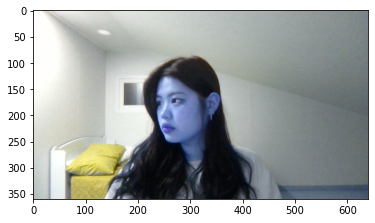

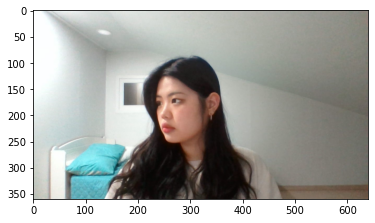

In [34]:
#이미지 읽기
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/testimage4.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지 불러오기
img_bgr = cv2.resize(img_bgr, (640, 360)) #resize
img_show = img_bgr.copy()      # 출력용 이미지 보관
plt.imshow(img_bgr)
plt.show()

#RGB 이미지로 색깔 보정처리 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(211, 140) (318, 247)]]


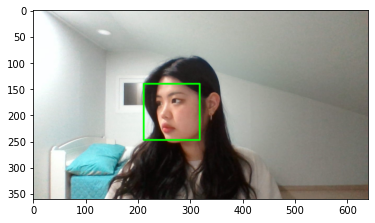

68


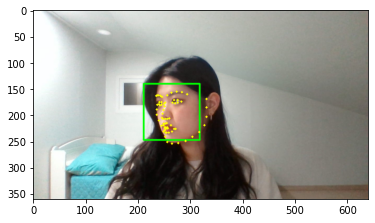

In [35]:
#dlib을 활용해 hog detecto 선언
detector_hog = dlib.get_frontal_face_detector()

#detector_hog를 이용해 얼굴의 bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #cvtColor()을 이용해 OpenCV bgr이미지 rgb로 변환
dlib_rects = detector_hog(img_rgb, 1)  #두번째 파라미터인 1은 이미지 피라미드의 수

#찾은 얼굴 출력
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#저장한 landmark 모델 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark 찾아내기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)  #rgb이미지, dlib.rectangle을 입력받아 dlib.full_object_detection를 반환
    # face landmark 좌표 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))  #point는 dlib.full_object_detection 객체로 parts() 함수로 개별 위치에 접근 가능
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

#랜드마크 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

(247, 197)
(x,y) : (247,143)
(w,h) : (108,108)
(108, 108, 3)
(x,y) : (193,150)


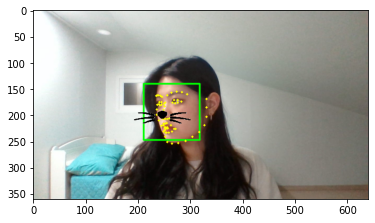

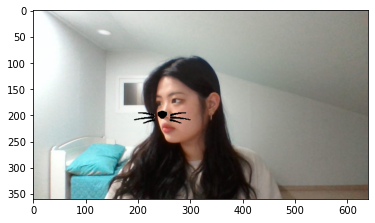

In [36]:
#코 중심점 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코 중심 index 30
    x = landmark[30][0] #x축
    y = landmark[30][1] - dlib_rect.height()//2  #y축
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    
#스티커 이미지 읽어서 적용
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

#스티커 이미지 추가를 위해 x,y좌표 조정
refined_x = x - w // 2 
refined_y = y + h // 15
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

#원본이미지에 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
sticker_added = cv2.addWeighted(img_sticker, 0.5, sticker_area, 0.5, 0)
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

#결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

#bounding box와 landmark제거
sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGBA))
plt.show()

얼굴 각도를 멀리서 옆면을 보며 테스트 해보았다.  
영역 좌표와 랜드마크가 잘 인식되었고, 이전과 같이 랜드마크의 입 부분이 미세하게 맞지 않았지만 스티커 적용에는 문제 없었다.


예상보다 스티커 적용에 문제점을 크게 발견하지 못해, 번외로 마스크를 썼을 때 적용되는지 테스트 해보았다.

#### 4. 마스크 착용

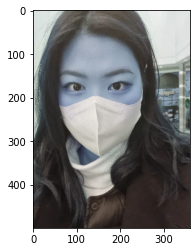

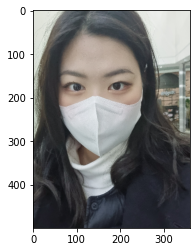

In [37]:
#이미지 읽기
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/testimage5.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지 불러오기
img_bgr = cv2.resize(img_bgr, (360, 500)) #resize
img_show = img_bgr.copy()      # 출력용 이미지 보관
plt.imshow(img_bgr)
plt.show()

#RGB 이미지로 색깔 보정처리 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(43, 118) (266, 341)]]


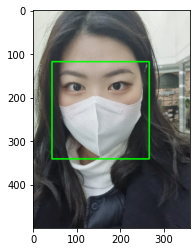

68


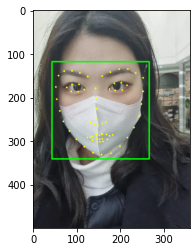

In [38]:
#dlib을 활용해 hog detecto 선언
detector_hog = dlib.get_frontal_face_detector()

#detector_hog를 이용해 얼굴의 bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #cvtColor()을 이용해 OpenCV bgr이미지 rgb로 변환
dlib_rects = detector_hog(img_rgb, 1)  #두번째 파라미터인 1은 이미지 피라미드의 수

#찾은 얼굴 출력
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#저장한 landmark 모델 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark 찾아내기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)  #rgb이미지, dlib.rectangle을 입력받아 dlib.full_object_detection를 반환
    # face landmark 좌표 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))  #point는 dlib.full_object_detection 객체로 parts() 함수로 개별 위치에 접근 가능
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

#랜드마크 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

(146, 250)
(x,y) : (146,138)
(w,h) : (224,224)
(224, 224, 3)
(x,y) : (34,152)


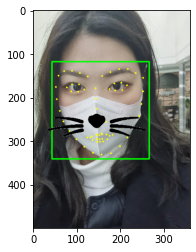

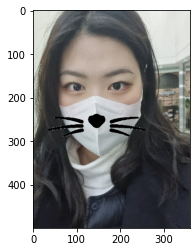

In [39]:
#코 중심점 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코 중심 index 30
    x = landmark[30][0] #x축
    y = landmark[30][1] - dlib_rect.height()//2  #y축
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    
#스티커 이미지 읽어서 적용
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

#스티커 이미지 추가를 위해 x,y좌표 조정
refined_x = x - w // 2 
refined_y = y + h // 15
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

#원본이미지에 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
sticker_added = cv2.addWeighted(img_sticker, 0.5, sticker_area, 0.5, 0)
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

#결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

#bounding box와 landmark제거
sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGBA))
plt.show()

영역 좌표는 얼굴의 약간 밑이지만 잘 인식되었고, 랜드마크에서 재미있는 점을 발견했다.  
코와 입이 드러나지 않음에도 불구하고 임의로 코와 입을 인식한다는 점이다.  
실제 코의 위치보다는 낮지만, 스티커가 모델이 임의적으로 정한 코 중앙부분에 적용된 것을 확인할 수 있다.  

---

## EXPLORATION 03 회고

SNOW카메라와 같은 얼굴 인식 카메라가 처음 등장 했을 때, 카메라에서 스스로 사람의 얼굴을 인식하고 정확한 위치에 스티커를 적용한다는 점이 신기하면서도 재미있었는데, 직접 만들어보며 과정을 알아보는 시간이 흥미로웠다. 처음에 만든 스티커는 너무 작고, 영역좌표와 랜드마크가 너무 흐리고, 인식도가 낮아 정확도가 높지 않아서 개인적인 욕심으로 정확도를 높히느라 시간은 오래걸렸지만 테스트 과정이 재미있어서 더 다양한 사진으로 테스트 해보고 싶고, 다른 스티커로 다른 위치에 테스트 해보고 싶다.

-프로젝트를 진행하며 아쉬웠던 점  
스티커 뒤로 원본이미지가 같이 보이도록 cv2.addWeighted()를 참고해 sticker_added = cv2.addWeighted(img_sticker, 0.5, sticker_area, 0.5, 0) 을 사용했지만, 스티커가 반투명해지지 않아 실패했다 ㅠ

-프로젝트를 진행하며 궁금했던 점  
프로젝트 전 익스3 실습에서는 따로 resize를 하지 않고 실습을 진행했는데, 테스트 이미지에 영역좌표와 랜드마크가 뚜렷하게 잡혔다. resize를 하지 않아도 테스트 이미지의 원본 크기가 커서, 혹은 이미 resize되어서 그런건지 궁금하다. 내가 진행한 프로젝트에서는 resize를 하지 않으면 영역좌표와 랜드마크가 매우 희미하게 나왔기 때문이다.



2022-01-18

---